<a href="https://colab.research.google.com/github/georgeragan/CREDIT-CARD/blob/main/CREDIT_CARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE DEPENDENCIES**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

**LOADING DATA SETS**

In [8]:
data=pd.read_csv("/content/creditcard.csv")

In [9]:
data.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


CHECKING NULL VALUES

In [7]:
data.isnull().sum().sum()

0

CHECKING UNIQUE VALUES

In [14]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

CHECKING INFO ABOUT DATASET

In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

CLASSIFYING DATA BASED ON TARGET

In [16]:
legit=data[data["Class"]==0]
fraud=data[data["Class"]==1]

In [20]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [22]:
legit.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

SPLITTING THE LEGIT DATASET

In [28]:
legit_sample=legit.sample(n=492)

JOINING TWO DATASETS

In [29]:
data_merge=pd.concat([legit_sample,fraud],axis=0)

In [30]:
data_merge

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3347,2896.0,-2.492362,1.466422,1.245058,3.149241,-2.069769,1.260684,-0.489723,1.545643,-0.954816,...,0.017919,0.086688,-0.156986,0.115427,0.059958,0.285249,0.163548,-0.144718,204.52,0
84424,60299.0,1.190672,0.165377,0.252347,0.867964,0.127919,0.282985,-0.107592,0.058263,-0.163335,...,-0.075572,-0.266404,-0.160316,-0.845621,0.551603,-0.429361,0.027668,0.016660,36.00,0
211776,138566.0,-0.563714,-0.116206,0.295480,0.044483,1.103031,1.081186,0.722361,0.218644,0.136076,...,-0.159864,-0.423210,0.141404,-0.397288,-0.109637,-0.360679,0.145504,0.177242,129.09,0
134100,80646.0,-1.492435,1.086487,1.524821,-0.506240,0.431887,-0.645224,0.775438,0.002432,-0.182071,...,-0.304450,-0.719063,-0.292147,0.022397,0.119154,-0.023277,-0.416256,-0.447329,13.67,0
273164,165455.0,1.931742,-0.410225,-0.347503,0.156016,-0.754461,-0.833868,-0.370011,-0.140648,1.471813,...,-0.142098,-0.277566,0.318087,0.005932,-0.342381,-0.955163,0.058040,-0.021001,37.89,0
105282,69448.0,-0.578799,0.164141,2.092172,0.484859,-0.994191,-0.077778,-0.186935,0.130556,-1.571773,...,-0.079982,0.156608,-0.067345,0.486573,-0.357065,-0.235779,0.071614,0.140237,59.00,0


SHUFFLING DATASETS

In [31]:
data=data_merge.sample(frac=1)


RESETTING THE INDEX

In [33]:
data=data.reset_index(drop=True)

In [36]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,139296.0,-4.097829,2.455351,-1.326742,-2.300671,-2.272852,-0.681842,-2.338540,3.036692,0.213403,...,0.095703,-0.673037,-0.045708,0.752387,0.454457,-0.437937,-1.073048,-0.365408,3.98,0
1,137928.0,-0.365991,1.002555,0.108700,-0.905415,0.630590,-0.618230,1.094185,-0.227333,0.290509,...,-0.350289,-0.555189,0.041948,-0.359033,-0.399985,0.123913,0.293224,-0.013531,11.48,0
2,78397.0,1.352892,-0.700106,0.615104,-0.841173,-1.099368,-0.088233,-0.952013,0.113462,-0.721365,...,-0.467817,-0.956744,0.105193,-0.357946,-0.046407,0.882258,-0.038872,0.004685,14.90,0
3,81127.0,-0.540825,0.495148,1.390938,1.094099,0.124843,-1.207059,0.523137,-0.072832,-0.416725,...,0.207499,0.411793,0.025205,0.680237,-0.329456,-0.350602,0.141091,0.173571,31.50,0
4,62662.0,-1.883437,-1.380955,2.388316,-0.827050,1.258031,-0.272670,-0.638421,0.362438,0.683194,...,-0.038439,-0.166950,0.208920,-0.238256,-0.073699,0.800028,0.043196,-0.052568,58.13,0


DIFFERTIATING INTO FEATURES AND TARGET

In [38]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

SPLITTING DATA INTO TESTING AND TRAINING

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

MODEL INITIALISATION AND PREDICTION

In [42]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

EVALUATION TECHNIQUES

In [43]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9390862944162437


In [44]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[94  5]
 [ 7 91]]


<Axes: >

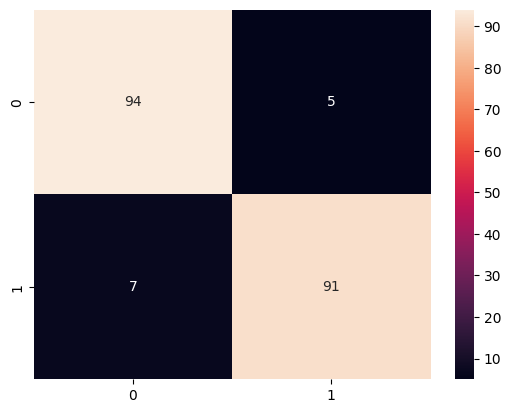

In [45]:
sns.heatmap(cm,annot=True)